# ML Model
## Decision Trees

In [1]:
# 1. IMPORTS Done
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, r2_score, auc
import matplotlib.colors as mcolors
from sklearn import tree

In [2]:
heartML = pd.read_csv("heartML.csv")
print(heartML.shape)
heartML.info()
heartML.head(5)

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Drop columns that are not necessary for analysis
# Drop Age and Sex [Remainder: Reasons for Heart attack]

def removeC(tempDf, NotUsed):
    
    useCols = []
    data = {}
    for col in tempDf.columns:
        if col not in NotUsed:
            data[col] = tempDf[col]

    newDf = pd.DataFrame(data) 
    return newDf

heartMLNotUsed = ['age', 'sex']
heartML = removeC(heartML, heartMLNotUsed)

In [4]:
heartML = heartML.rename(columns = {'cp':'chest_pain','trtbps': 'resting_bp(mmhg)','chol': 'cholestoral(mg/dl)','fbs': 'fasting_blood_sugar(1/0)',
                                    'thalachh': 'max_heart_rate','exng': 'exercise_anigna(1/0)','caa': 'num_major_vessels(0-3)'
                                    })

In [5]:
heartML.drop_duplicates(inplace=True)
print(sum(heartML.duplicated()))

0


In [6]:
heartML.isnull().sum()

chest_pain                  0
resting_bp(mmhg)            0
cholestoral(mg/dl)          0
fasting_blood_sugar(1/0)    0
restecg                     0
max_heart_rate              0
exercise_anigna(1/0)        0
oldpeak                     0
slp                         0
num_major_vessels(0-3)      0
thall                       0
output                      0
dtype: int64

1    164
0    138
Name: output, dtype: int64


Text(0.5, 1.0, 'Distribution of target values')

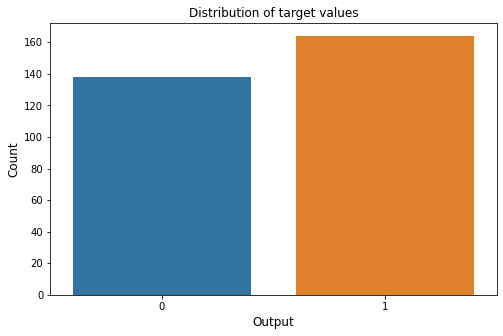

In [7]:
# barplot
print(heartML['output'].value_counts())
plt.figure(figsize = (8, 5))
sns.countplot(x = heartML['output'])
plt.xlabel("Output", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Distribution of target values", size = 12)

1    164
0    138
Name: output, dtype: int64


Text(0.5, 1.0, 'Distribution of target values')

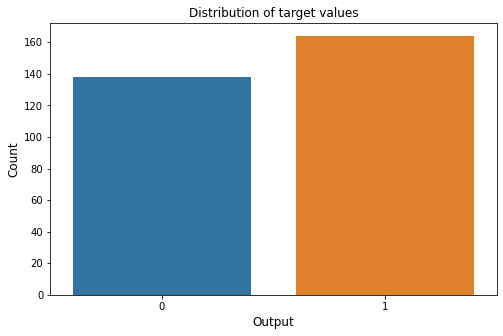

In [8]:
# barplot
print(heartML['output'].value_counts())
plt.figure(figsize = (8, 5))
sns.countplot(x = heartML['output'])
plt.xlabel("Output", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Distribution of target values", size = 12)

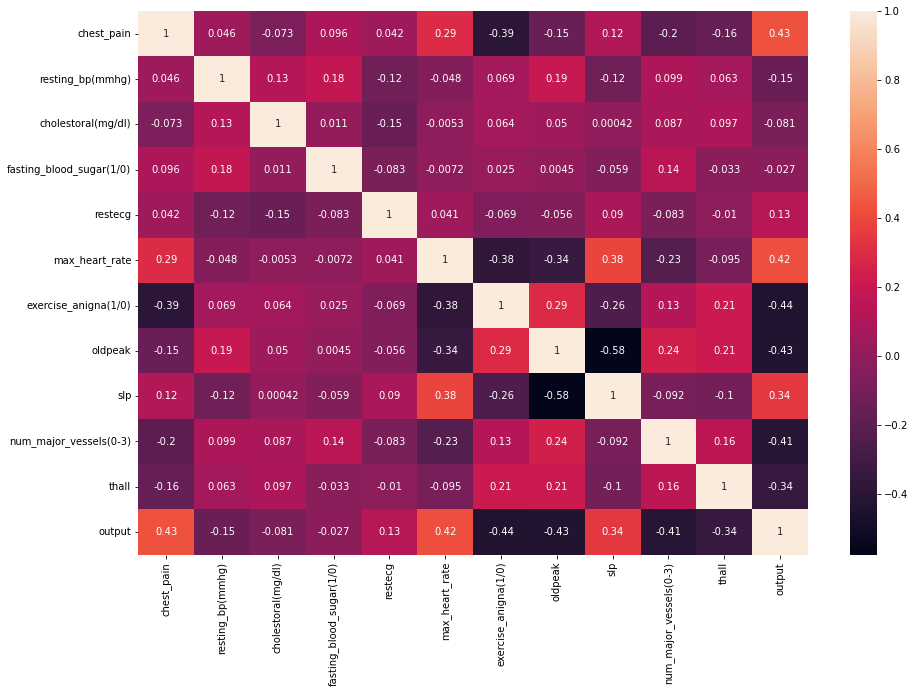

In [9]:
# heatmap
plt.figure(figsize = (15,10))
sns.heatmap(heartML.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

In [10]:
# Building the model
model = DecisionTreeClassifier()

In [11]:
# preprocessing the dataset
X = heartML.iloc[:,heartML.columns != 'output']
y = heartML.output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5, stratify=y)

# standard scaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the model
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [12]:
# Training the model
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [13]:
# Evaluating the training set
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 100.0


In [14]:
# Evaluating on test set
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 45.90163934426229


In [15]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      1.00      0.63        28
           1       0.00      0.00      0.00        33

    accuracy                           0.46        61
   macro avg       0.23      0.50      0.31        61
weighted avg       0.21      0.46      0.29        61



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

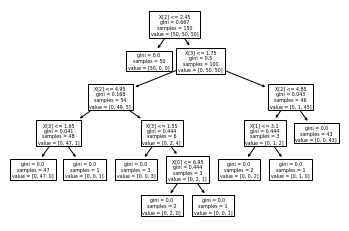

In [16]:
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)